## TapDanceDecoder: MVP

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,roc_curve, auc,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Get Data

In [26]:
#tap_df = pd.read_csv('../../../Source/Data/Train_data_n40.csv')
#tap_df = pd.read_csv('../../../Source/Data/audio_data.csv')
#tap_df = pd.read_csv('../../../Source/Data/audio_data_full.csv')
#tap_df = pd.read_csv('../../../Source/Data/audio_data_filterbanks.csv')
#tap_df = pd.read_csv('../../../Source/Data/audio_data_augmented.csv')
tap_df = pd.read_csv('../../../Source/Data/train_data_reaugmented_pad_mfcc.csv')
#tap_df = pd.read_csv('../../../Source/Data/train_data_reaugmented_zcr.csv')
#tap_df = pd.read_csv('../../../Source/Data/train_data_augmented_stft_tempo.csv')

In [27]:
tap_df.head()

,Path,Labels,0,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,19
0,../../../Source/Clean_train_clips/Re_augmented...,1,-513.434783,42.275352,-43.574934,8.922600,-11.386917,5.315976,-14.234438,-1.206219,...,-8.755037,-4.508263,-5.842792,-3.051108,-4.320598,-3.928329,-0.795162,-3.953750,-2.532973,-2.307693
1,../../../Source/Clean_train_clips/Re_augmented...,1,-520.366836,42.178901,-42.901227,8.465756,-6.467199,3.962063,-10.262548,2.102345,...,-6.013928,-3.190040,-4.381639,-2.809416,-0.952587,-3.608523,-0.974664,-2.792483,-2.055713,-1.199564
2,../../../Source/Clean_train_clips/Re_augmented...,0,-338.287209,59.362735,-45.628555,17.710239,-12.615943,-4.175951,-16.339347,-12.162610,...,-14.960085,-5.714965,-7.746904,-4.678124,-5.567488,-6.126950,-5.093155,-4.679337,-6.816532,-2.937599
3,../../../Source/Clean_train_clips/Re_augmented...,1,-381.970414,51.246450,-47.111796,19.729852,-4.108406,2.620009,-9.760340,-1.519934,...,-11.461138,-5.805019,-6.461581,-9.079039,-8.321539,-7.406770,-5.146965,-6.835102,-3.355231,-1.591103
4,../../../Source/Clean_train_clips/Re_augmented...,1,-496.690477,41.429445,-39.020128,12.506958,-9.727698,3.349217,-11.389727,2.234426,...,-9.346168,-3.828823,-5.700296,-6.104075,-4.188008,-4.387148,1.377132,-3.326681,-1.626681,-1.369617


## Models

### Split the data / Load the data

In [28]:
data = tap_df.iloc[:,2:].values
labels = tap_df['Labels']

In [29]:
#data
#labels


In [30]:
#X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=11, stratify=labels)

In [31]:
#X_train = pd.read_csv('../../../Source/Data/X_train_mfccplus.csv')
#y_train = pd.read_csv('../../../Source/Data/y_train_mfccplus.csv')
#X_test = pd.read_csv('../../../Source/Data/X_test_mfccplus.csv')
#y_test = pd.read_csv('../../../Source/Data/y_test_mfccplus.csv')
#
#X_train = X_train.drop(['Path'], axis = 1).values
#X_test = X_test.drop(['Path'], axis = 1).values
#y_train = y_train.values.ravel()
#y_test = y_test.values.ravel()

In [32]:
X_train = data
y_train = labels

In [33]:
X_test = pd.read_csv('../../../Source/Data/X_test_audio_pad_mfcc.csv')
y_test = pd.read_csv('../../../Source/Data/y_test_audio_pad_mfcc.csv')

In [34]:
X_test.head()

,Path,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,../../../Source/Clean_train_clips/Test_pad/Bal...,-293.037943,58.505334,-48.589866,17.169116,-6.572513,7.458624,-18.516129,-4.076180,-5.928857,...,-11.396065,-6.967381,-13.589901,-5.837967,-5.179842,-7.704733,-7.414687,-3.320110,-5.325567,-0.951670
1,../../../Source/Clean_train_clips/Test_pad/Shu...,-384.336383,47.068545,-45.293521,13.427367,-13.270577,-1.291721,-13.609023,3.785221,-10.895158,...,-10.857611,-4.648366,-7.143908,-5.901735,-5.324317,-5.204102,-2.262903,-4.743410,-4.527111,-4.428521
2,../../../Source/Clean_train_clips/Test_pad/Bal...,-520.247082,27.081231,-20.913136,6.208832,-1.711949,3.825482,-8.540246,-3.395663,-4.924479,...,-5.470911,-2.400662,-2.123239,-4.389208,-4.464401,-2.490282,-1.779873,-3.779712,-1.225601,-1.614159
3,../../../Source/Clean_train_clips/Test_pad/Shu...,-308.469831,56.266528,-82.179828,26.003649,-6.314797,1.156485,-14.727843,-3.775998,-8.173048,...,-18.237127,-3.376053,-11.601492,-3.089659,-6.187914,-4.790451,-3.271651,-3.614034,-4.755073,-3.978672
4,../../../Source/Clean_train_clips/Test_pad/Shu...,-331.345416,62.737518,-70.032324,17.782250,-3.121940,-4.137454,-15.838885,0.413734,-6.607059,...,-16.465318,-1.578397,-10.076773,-4.570083,-4.776446,-6.193735,-4.736327,-5.317162,-4.541855,-3.242185


In [35]:
X_test = X_test.iloc[:,1:].values
y_test = y_test['Labels']

## Logistic Regression

In [36]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
predict = logreg.predict(X_test)
proba = logreg.predict_proba(X_test)

In [38]:
results = pd.DataFrame()
results['True'] = y_test
results['Predict_lr'] = predict
results['Prob_0_lr'] = proba[:,0]

In [39]:
mistakes = results.copy()
mistakes = mistakes.loc[~(mistakes['True'] == mistakes['Predict_lr'])]
mistakes

,True,Predict_lr,Prob_0_lr
6,1,0,0.991939
7,0,1,0.023048
13,1,0,0.987399
14,1,0,0.948028
21,1,0,0.823009
29,1,0,0.560909
35,1,0,0.831596
36,1,0,0.686126
44,1,0,0.935907
45,1,0,0.998826


In [40]:
print('Accuracy score: ' + str(accuracy_score(y_test, predict)))

Accuracy score: 0.8434782608695652


### Visualizing results

In [41]:
def ROC_plot (testname, y_true, y_prob):
    
    logit_roc_auc = roc_auc_score(y_true, y_prob)
    
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate', size=15)
    plt.ylabel('True Positive Rate', size=15)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.title('ROC: ' + testname, size=25)
    
    plt.show()
    print ('ROC_AUC_Score: ' + str(logit_roc_auc))

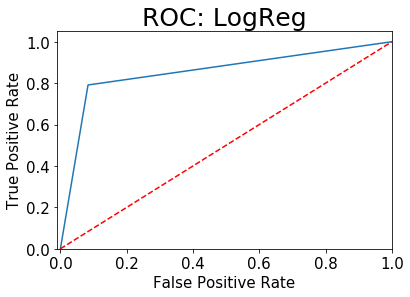

ROC_AUC_Score: 0.8538557213930348


In [42]:
ROC_plot('LogReg',  y_test, predict )

## Can't see the forest for the trees.... Random Forest Classifier

In [43]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
predict_rf = rnd_clf.predict(X_test)
proba_rf = rnd_clf.predict_proba(X_test)

In [45]:
results['Predict_rf'] = predict_rf
results['Prob_0_rf'] = proba_rf[:,0]

In [46]:
mistakes = results.copy()
mistakes = mistakes.loc[~(mistakes['True'] == mistakes['Predict_rf'])]
mistakes

,True,Predict_lr,Prob_0_lr,Predict_rf,Prob_0_rf
2,0,0,0.857030,1,0.403425
45,1,0,0.998826,0,0.571381
54,1,0,0.992704,0,0.507619
63,0,0,0.591287,1,0.269156
68,0,1,0.348132,1,0.383046
71,0,0,0.980559,1,0.421881
87,1,0,0.519459,0,0.578583
91,1,1,0.441035,0,0.518463
97,0,0,0.868744,1,0.434614
109,0,1,0.429989,1,0.422887


So where the Random Forest model makes mistakes, the LogReg model makes correct predictions. <br/>Perhaps a voting classifier would improve the accuracy even more.

In [47]:
print('Accuracy score: ' + str(accuracy_score(y_test, predict_rf)))

Accuracy score: 0.9130434782608695


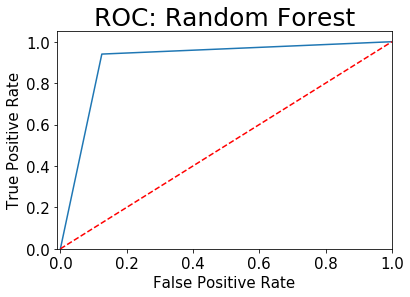

ROC_AUC_Score: 0.9076492537313433


In [48]:
ROC_plot('Random Forest', y_test, predict_rf)

In [49]:
#results.to_csv('../../../Source/Data/results_sklearn_reaugmented_pad_mfcc.csv', index = False)